<a href="https://colab.research.google.com/github/surajmalaka29/California-Housing-Dataset-ML-Project/blob/main/Ai_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upload Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving housing_data.csv to housing_data.csv


# **Import Required Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


# **Load and Explore the Dataset**

In [5]:
# Load the dataset
df = pd.read_csv('housing_data.csv')

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Display dataset information
print("\nDataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive statistics for specific columns
print("\nDescriptive Statistics for Median Income:")
print(df['median_income'].describe())

print("\nDescriptive Statistics for Total Rooms:")
print(df['total_rooms'].describe())

print("\nDescriptive Statistics for Population:")
print(df['population'].describe())


First 10 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0     

# **Handle Missing Values**

In [6]:
# Handle missing values in total_bedrooms
# Option 1: Fill with median (recommended)
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Verify no missing values remain
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# **Create Visualizations**

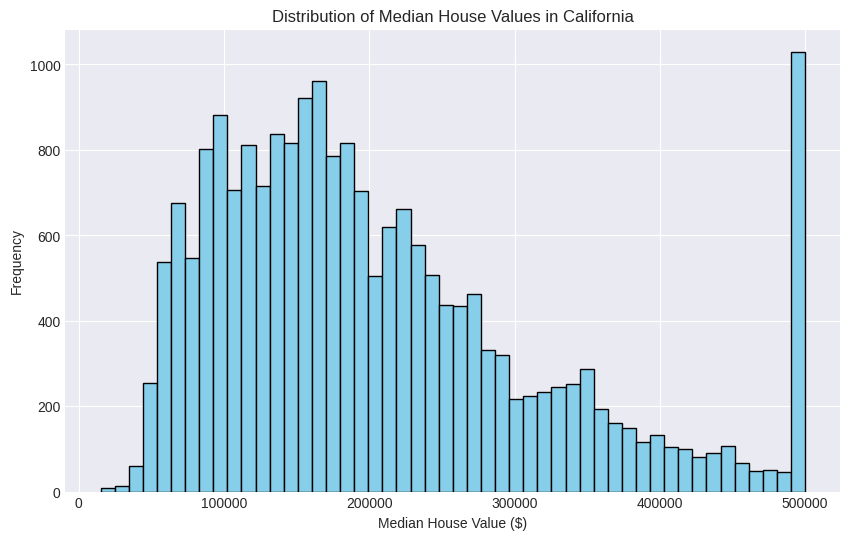

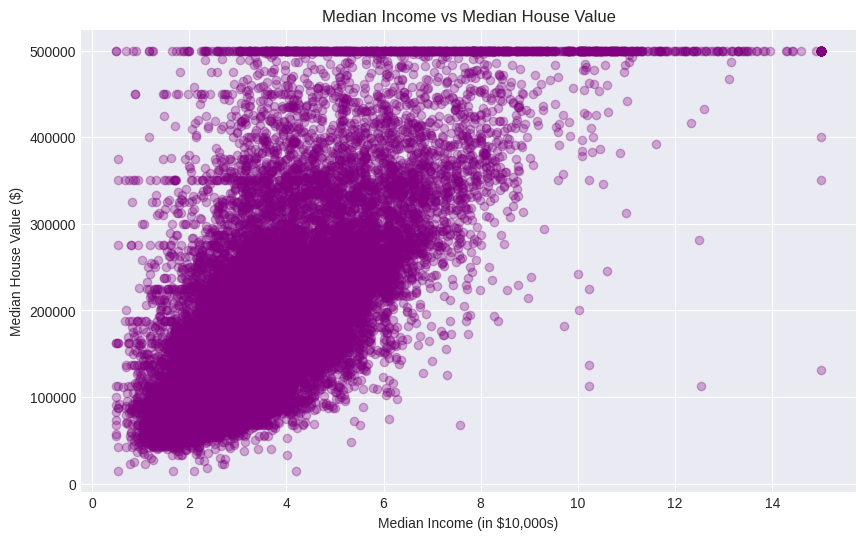

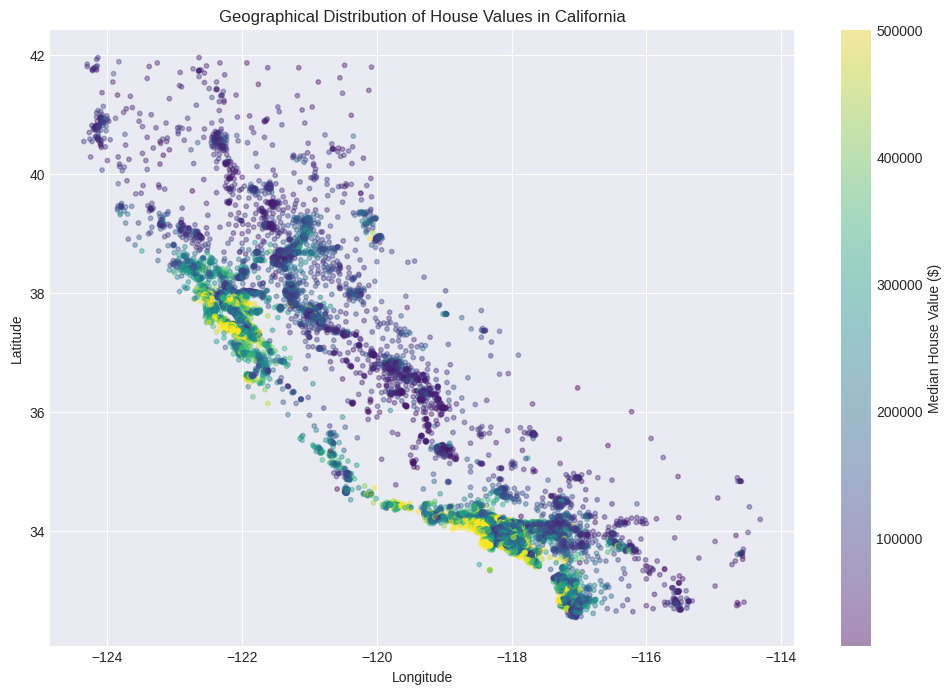

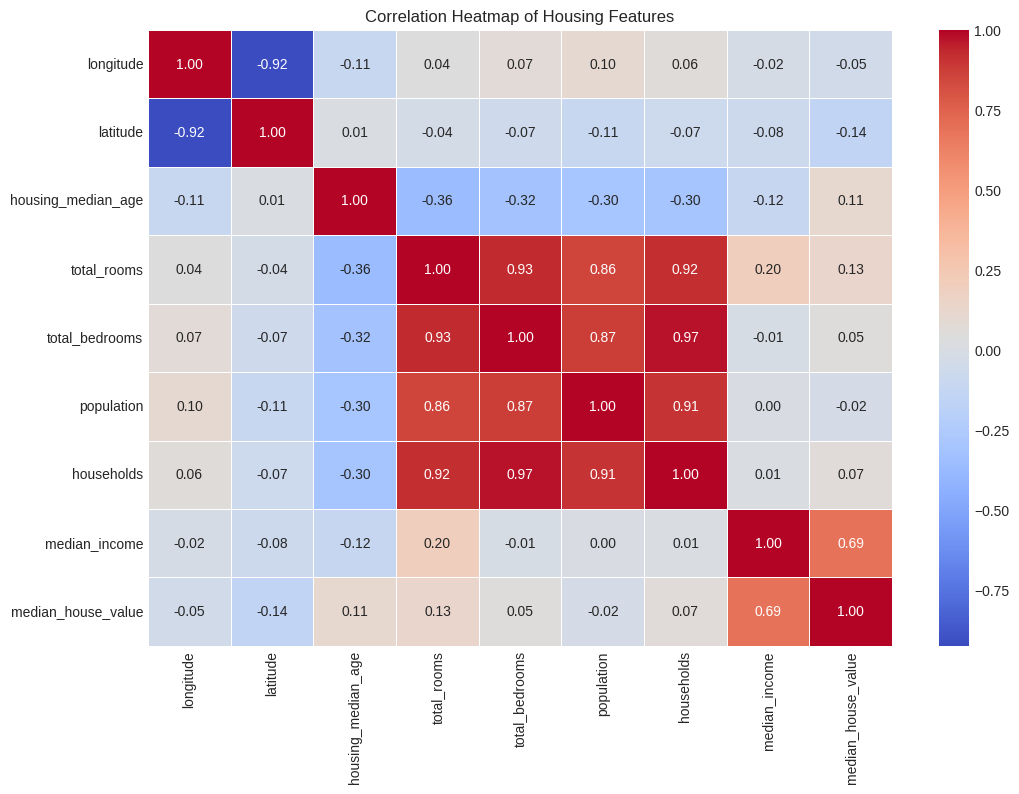


Correlation with Median House Value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [7]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Histogram of Median House Value
plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Values in California')
plt.show()

# 2. Scatter plot: Median Income vs House Value
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3, color='purple')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value ($)')
plt.title('Median Income vs Median House Value')
plt.show()

# 3. Geographical scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['longitude'], df['latitude'],
                     c=df['median_house_value'],
                     cmap='viridis', alpha=0.4, s=10)
plt.colorbar(scatter, label='Median House Value ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of House Values in California')
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Housing Features')
plt.show()

# Find feature most correlated with house value
correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("\nCorrelation with Median House Value:")
print(correlations)


# **Build Predictive Models**

In [8]:
# Prepare data for modeling
# Select only numerical features (exclude ocean_proximity for simplicity)
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

# Split  80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2,
                                                     random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 16512 samples
Testing set size: 4128 samples


***Linear Regression Model***

In [9]:
# Build Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("\n=== Linear Regression Results ===")
print(f"Mean Squared Error (MSE): ${lr_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${np.sqrt(lr_mse):,.2f}")
print(f"R² Score: {lr_r2:.4f}")



=== Linear Regression Results ===
Mean Squared Error (MSE): $5,059,928,371.17
Root Mean Squared Error (RMSE): $71,133.17
R² Score: 0.6139


***Decision Tree Regressor Model***

In [10]:
# Build Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("\n=== Decision Tree Regressor Results ===")
print(f"Mean Squared Error (MSE): ${dt_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${np.sqrt(dt_mse):,.2f}")
print(f"R² Score: {dt_r2:.4f}")



=== Decision Tree Regressor Results ===
Mean Squared Error (MSE): $3,934,969,543.37
Root Mean Squared Error (RMSE): $62,729.34
R² Score: 0.6997


***Compare Both Models***


=== Model Comparison ===
               Model           MSE          RMSE  R² Score
0  Linear Regression  5.059928e+09  71133.173493  0.613866
1      Decision Tree  3.934970e+09  62729.335588  0.699714


<Figure size 1000x600 with 0 Axes>

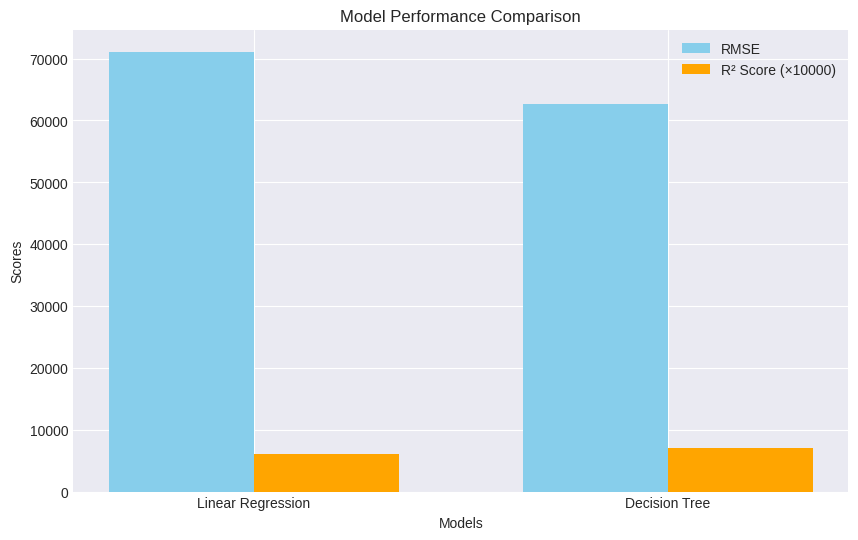

In [11]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [lr_mse, dt_mse],
    'RMSE': [np.sqrt(lr_mse), np.sqrt(dt_mse)],
    'R² Score': [lr_r2, dt_r2]
})

print("\n=== Model Comparison ===")
print(comparison_df)

# Visualize comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(comparison_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, comparison_df['RMSE'], width,
               label='RMSE', color='skyblue')
bars2 = ax.bar(x + width/2, comparison_df['R² Score']*10000, width,
               label='R² Score (×10000)', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
plt.show()


# **Download Your Results**

In [12]:
# Download the notebook as .ipynb file
from google.colab import files

# Save predictions to CSV (optional)
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'LR_Predicted': lr_predictions,
    'DT_Predicted': dt_predictions
})
results_df.to_csv('predictions.csv', index=False)
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>